<a href="https://colab.research.google.com/github/Edu-RFB/DSWP_Aluno/blob/main/Machine_Learning_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **DEFINIÇÃO DE VARIÁVEIS GLOBAIS**

In [55]:
i_CV= 10 # Número de Cross-Validations
i_Seed= 20111974 # semente por questões de reproducibilidade
f_Test_Size= 0.3 # Proporção do dataframe de validação

In [56]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples = 1000000, # Número de amostras (default = 100)
                           n_features = 18, # Número total de recursos (default = 20)
                           n_informative = 9, # Número de recursos informativos (default = 2)
                           n_redundant = 6, # Número de recursos redundantes. Esses recursos são gerados como
                                            # combinações lineares aleatórias dos recursos informativos. (default = 2)
                           n_repeated = 3, # O número de recursos duplicados, extraídos aleatoriamente do informativo
                                          # e os recursos redundantes. (default = 0)
                           n_classes = 2, # número de classes (ou rótulos) do problema de classificação. (default = 2)
                           n_clusters_per_class = 1, # O número de clusters por classe. (default = 2)
                           random_state=i_Seed)
# Obs.: n_informative + n_redundant + n_repeated é igual a n_features

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [58]:
l_colunas= ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18']
df_X = pd.DataFrame(X, columns = l_colunas)
df_Y = pd.DataFrame(Y, columns = ['target'])

In [59]:
df_X.shape

(1000000, 18)

In [60]:
df_Y.shape

(1000000, 1)

In [61]:
df_X.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.000364,0.908153,0.000783,0.998820,0.998797,0.058646,0.908153,0.000989,0.997260,0.365548,-0.001726,-0.000797,0.998797,-0.689586,-2.103473,0.998820,-1.592432,0.996938
std,1.883183,2.105883,1.990911,1.277555,2.064946,3.238700,2.105883,2.040060,1.973741,2.409626,2.227355,2.224183,2.064946,4.233681,4.144720,1.277555,2.853225,1.518364
min,-8.265991,-9.466676,-9.233483,-5.318998,-9.910954,-19.571521,-9.466676,-10.080285,-8.788654,-12.510377,-10.461313,-9.359532,-9.910954,-16.227021,-21.065771,-5.318998,-16.187071,-7.594100
25%,-1.317314,-0.511037,-1.349903,0.149855,-0.380953,-2.182614,-0.511037,-1.432121,-0.333646,-1.110964,-1.489372,-1.540392,-0.380953,-3.778341,-4.892467,0.149855,-3.501145,-0.025680
50%,-0.046680,0.907848,0.038258,0.998562,0.997901,-0.389550,0.907848,-0.209871,0.996049,0.458463,0.059038,-0.067150,0.997901,-1.183487,-2.081648,0.998562,-1.578765,0.995232
75%,1.281656,2.328303,1.384925,1.846269,2.379972,1.930396,2.328303,1.263573,2.329680,1.940860,1.540651,1.478872,2.379972,2.124122,0.712244,1.846269,0.335422,2.020443
max,8.548590,11.290145,9.030293,8.152252,11.725774,17.288870,11.290145,12.059203,10.654171,12.983026,10.316555,10.494231,11.725774,20.442521,18.275846,8.152252,11.400286,8.234281


In [62]:
df_Y.value_counts()

target
1         500058
0         499942
dtype: int64

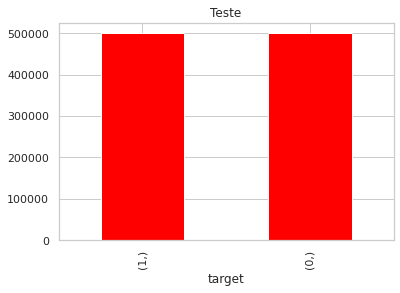

In [63]:
df_Y.value_counts().plot.bar(color = 'red', title = 'Teste');

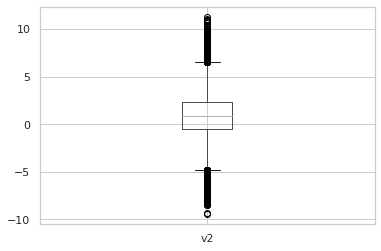

In [67]:
df_X.boxplot(column = 'v2')
# plt.show()

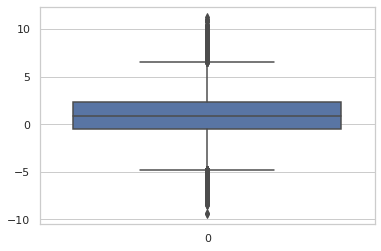

In [30]:
sns.set(style= 'whitegrid', color_codes= True)
sns.boxplot(data = df_X['v2']);

In [31]:
valor1 = df_X['v2']

In [52]:
print(valor1.mean(), valor1.median())

0.9081525551543457 0.9078483056836463


In [33]:
Q1 = valor1.quantile(.25)
Q3 = valor1.quantile(.75)
lim_inferior = Q1 - 1.5*(Q3 - Q1)
lim_superior = Q3 + 1.5*(Q3 - Q1)
print(f'Q1: {Q1}, Q3: {Q3}, Limite Inferior: {lim_inferior} e Limite Superior: {lim_superior}')

Q1: -0.5110368611393332, Q3: 2.3283028244058865, Limite Inferior: -4.770046389457162 e Limite Superior: 6.587312352723716


In [37]:
valor1[valor1 >= lim_inferior]

0         1.709998
1         4.920089
2        -0.297394
3         3.247157
4         2.907033
            ...   
999995    1.717762
999996    0.774905
999997    0.388072
999998   -0.946133
999999   -1.545765
Name: v2, Length: 996472, dtype: float64

In [44]:
def remove_outliers(values):
  Q1, Q3 = np.percentile(values,[25,75])
  IQR = Q3 - Q1
  lim_inferior = Q1 - 1.5*IQR
  lim_superior = Q3 + 1.5*IQR
  return [v for v in values if v > lim_inferior and v < lim_superior]

In [46]:
valor2 = remove_outliers(valor1)

In [50]:
print(f'Total: {len(valor1)}, Restaram: {len(valor2)}, {len(valor1) - len(valor2)} Outliers removidos.')

Total: 1000000, Restaram: 992955, 7045 Outliers removidos.
